In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_69839_R')

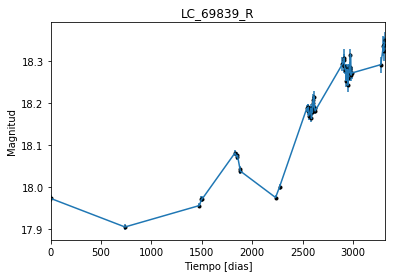

In [2]:
data = np.genfromtxt('LC_69839_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_69839_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

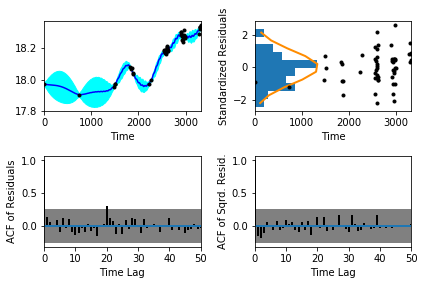

In [5]:
sample.assess_fit()

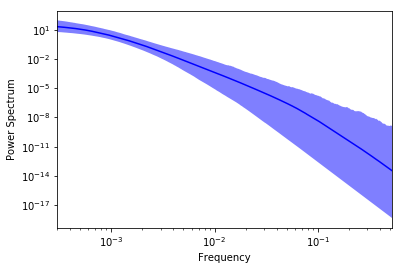

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_69839_R')

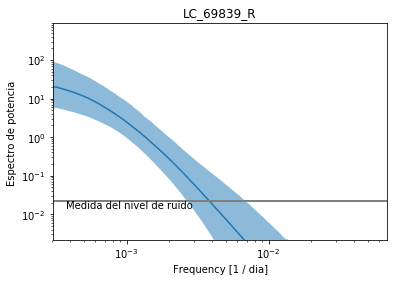

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_69839_R')

Text(0.5,1,'Prediccion , valor esperado LC_69839_R')

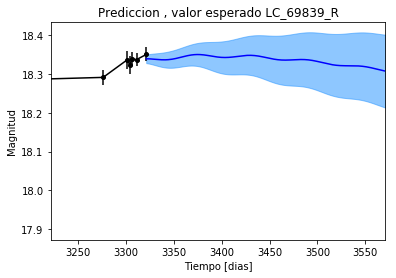

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_69839_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_69839_R')

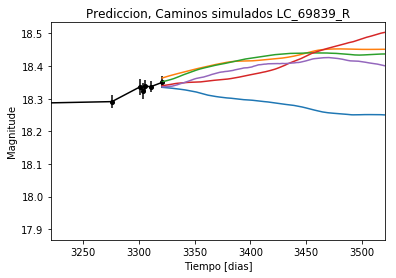

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_69839_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_69839_R')

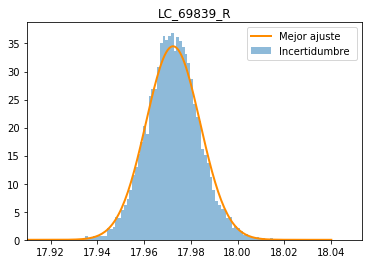

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_69839_R')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_R')

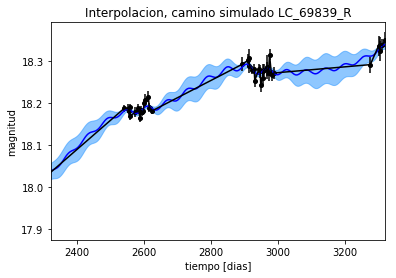

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_R')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_R')

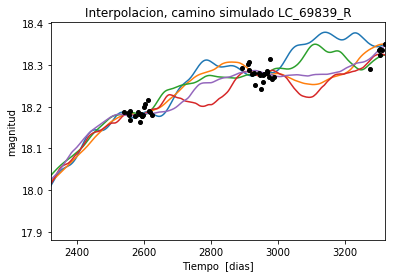

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1042.418517
Median: 0.0164884494917
Standard deviation: 0.216191048991
68% credibility interval: [ 0.00118642  0.26440254]
95% credibility interval: [  3.62425678e-04   8.31785515e-01]
99% credibility interval: [  3.12807989e-04   1.01522068e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 419.854083224
Median: 0.000837927914071
Standard deviation: 0.0578957894341
68% credibility interval: [ 0.00037845  0.00994984]
95% credibility interval: [ 0.00031102  0.12805798]
99% credibility interval: [  3.03247746e-04   4.28636265e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 382.187565768
Median: 0.0110128265963
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2071.22887077
Median: 160.43909008
Standard deviation: 1.54279970779
68% credibility interval: [ 158.70492548  161.48658422]
95% credibility interval: [ 156.2128723   162.11161405]
99% credibility interval: [ 154.23323257  162.36307858]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 558.626444329
Median: 0.69184881788
Standard deviation: 2.06276259389
68% credibility interval: [ 0.05262897  3.67112113]
95% credibility interval: [ 0.01336721  6.67219085]
99% credibility interval: [  9.32756275e-03   9.84068780e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 744.828497799
Median: 0.239073472886
Standard deviation: 6.55882509903
68% credibility interval: [ 0.01286449  3.06279195]
95% credibility interval: [  1.22

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 714.525498294
Median: 1.49986020649e-40
Standard deviation: 3.26346546942
68% credibility interval: [  9.86407559e-63   1.67107926e-13]
95% credibility interval: [  1.31905033e-78   1.29722819e+00]
99% credibility interval: [  1.13471098e-83   2.03958866e+01]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3408.65602404
Median: 18.078744605
Standard deviation: 0.106111572511
68% credibility interval: [ 17.98954273  18.16962741]
95% credibility interval: [ 17.87584186  18.29482991]
99% credibility interval: [ 17.77171583  18.43208986]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 454.872193239
Median: 0.0
Standard deviation: 0.186035393525
68% credibility interval: [ 0.          0.14356065]
95% credibility interval: [ 0.          0.75410476]
99% credibility interval: [ 0.          0.98774984]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 454.872193239
Median: 0.0
Standard deviation: 0.186035393525
68% credibility interval: [ 0.          0.14356065]
95% credibility interval: [ 0.          0.75410476]
99% credibility interval: [ 0.          0.98774984]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 611.170128426
Median: 0.0
Standard deviation: 0.000158713556455
68% credibility interval: [ 0.

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2071.22887077
Median: 160.43909008
Standard deviation: 1.54279970779
68% credibility interval: [ 158.70492548  161.48658422]
95% credibility interval: [ 156.2128723   162.11161405]
99% credibility interval: [ 154.23323257  162.36307858]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2032.02163438
Median: 0.032558007415
Standard deviation: 0.0404393033421
68% credibility interval: [ 0.01782327  0.06415373]
95% credibility interval: [ 0.01078015  0.14022185]
99% credibility interval: [ 0.00831535  0.23320923]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3138.46629324
Median: 1.04433129949
Standard deviation: 0.166700273487
68% credibility interval: [ 0.89650214  1.21536   ]
95% credibility interval: [ 0.77462274  1.42903723]
99% credibility interval: [ 0.71171924  1.59136293]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1007.87141364
Median: 2.28437894231e-05
Standard deviation: 0.00220203317434
68% credibility interval: [  9.91443179e-07   3.34952819e-04]
95% credibility interval: [  8.19093118e-08   3.04251552e-03]
99% credibility interval: [  2.02205642e-08   9.31399761e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1042.418517
Median: (-0.103599983585+0j)
Standard deviation: 1.79206025139
68% credibility interval: [-1.66129013+0.j         -0.00745449-0.28690225j]
95% credibility interval: [ -5.22626253e+00+0.j         -2.27718769e-03-0.0028625j]
99% credibility interval: [ -6.37881968e+00+0.j          -1.96543056e-03-0.09148293j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 419.854083224
Median: (-0.00526485635816+0j)
Standard deviation: 1.22419106631
68% credibility interval: [-0.06251669+0.19252486j -0.00237790+0.j        ]
95% credibility interval: [-0.80461199+0.02518644j -0.00195417+0.j        ]
99% credibility interval: [ -2.69320108e+00+0.j  -1.90536178e-03+0.j]
Posterior summary for parameter ar_roots  element 2
------